In [2]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
df = pd.read_csv('df_440.csv')

In [4]:
len(df) # Number of rows total

440

In [5]:
df['Handedness'] = pd.to_numeric(df['Handedness'],errors='coerce') 
df['DX'] = pd.to_numeric(df['DX'],errors='coerce')
df['Gender'] = pd.to_numeric(df['Gender'],errors='coerce')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Subject,ScanDir ID,Site,Gender,Age,Handedness,DX,...,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,ID,subID,has_brain
0,26,26,26,26,2371032.0,3,0.0,10.73,1.0,0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2371032,True
1,27,27,27,27,2026113.0,3,0.0,12.99,1.0,1,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2026113,True
2,28,28,28,28,3434578.0,3,0.0,8.12,1.0,0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-3434578,True
3,29,29,29,29,8628223.0,3,0.0,10.81,1.0,0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-8628223,True
4,30,30,30,30,1623716.0,3,0.0,12.65,1.0,1,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-1623716,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,707,707,707,707,16081.0,7,1.0,18.81,1.0,0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016081,True
436,709,709,709,709,16003.0,7,1.0,10.46,1.0,0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,sub-0016003,True
437,711,711,711,711,16057.0,7,0.0,16.74,1.0,0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016057,True
438,714,714,714,714,16023.0,7,0.0,12.51,0.0,0,...,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016023,True


In [6]:
'Number of female subjects = {}, Number of male subjects = {},'.format(df['Gender'].value_counts()[0.0], df['Gender'].value_counts()[1.0])

'Number of female subjects = 186, Number of male subjects = 253,'

In [7]:
'Number of ADHD subjects = {}, Number of typically developing subjects = {}'.format(df['DX'].value_counts()[1]+df['DX'].value_counts()[2]+df['DX'].value_counts()[3], df['DX'].value_counts()[0])

'Number of ADHD subjects = 179, Number of typically developing subjects = 261'

In [8]:
'Number of ADHD-Combined subjects = {}, Number of ADHD-Hyperactive/Impulsive subjects = {}, Number of ADHD-Inattentive subjects = {}, Number of typically developing subjects = {}'.format(df['DX'].value_counts()[1], df['DX'].value_counts()[2], df['DX'].value_counts()[3], df['DX'].value_counts()[0])

'Number of ADHD-Combined subjects = 111, Number of ADHD-Hyperactive/Impulsive subjects = 7, Number of ADHD-Inattentive subjects = 61, Number of typically developing subjects = 261'

In [9]:
'{} Right-handed, {} Left-handed, {} Ambidextrous'.format(df['Handedness'].value_counts()[1], df['Handedness'].value_counts()[0], df['Handedness'].value_counts()[2])

'237 Right-handed, 10 Left-handed, 1 Ambidextrous'

In [10]:
'Age: mean = {}, std = {}, range = {}-{}'.format(df['Age'].mean(), df['Age'].std(), df['Age'].min(), df['Age'].max())

'Age: mean = 11.692113636363636, std = 3.123639944337973, range = 7.17-20.89'

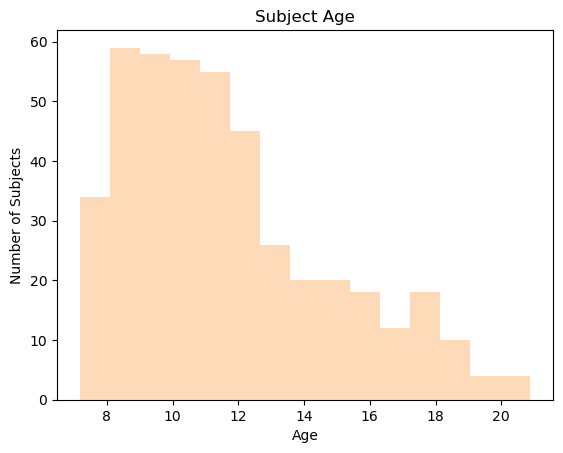

In [11]:
Age = df['Age']
plt.hist(Age,bins=15,color='peachpuff')
plt.title('Subject Age')
plt.xlabel('Age')
plt.ylabel('Number of Subjects')
plt.show()

In [12]:
ADHDdf = df[df['DX'] != 0]
TDdf = df[df['DX'] == 0]

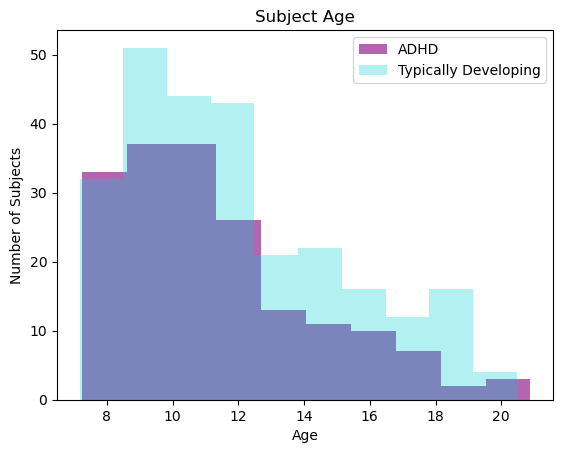

In [13]:
ADHDage = ADHDdf['Age']
plt.hist(ADHDage, alpha=0.6, color = 'purple')
TDage = TDdf['Age']
plt.hist(TDage, alpha=0.3, color='darkturquoise')
plt.title('Subject Age')
plt.xlabel('Age')
plt.ylabel('Number of Subjects')
plt.legend(['ADHD', 'Typically Developing'])
plt.show()

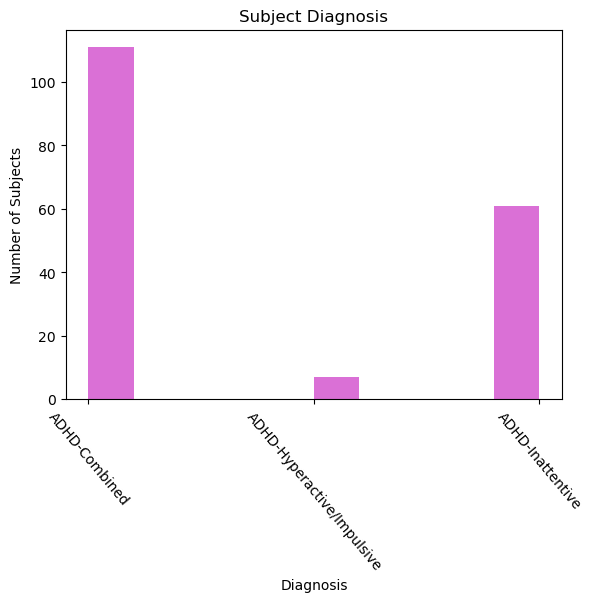

In [14]:
subtypedf = ADHDdf['DX']
plt.hist(subtypedf, color = 'orchid')
plt.title('Subject Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Subjects')
plt.xticks([1,2,3],['ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive'],rotation=-50)
plt.show()

In [15]:
femaledf = df[df['Gender']!=1]
maledf = df[df['Gender']!=0]

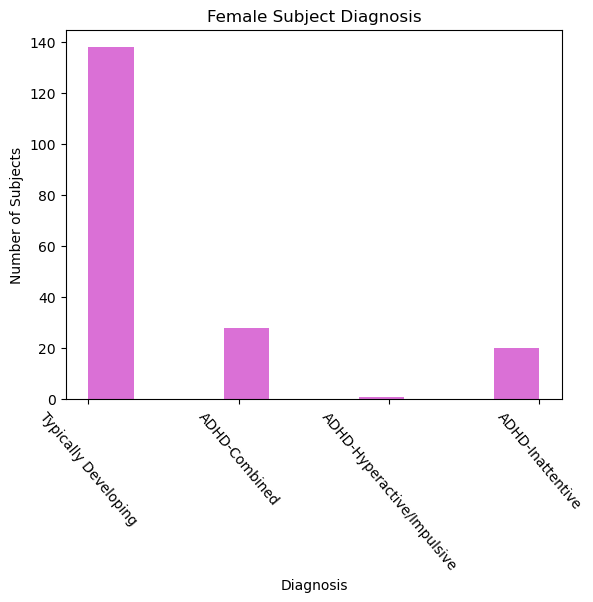

In [16]:
femaleDX = femaledf['DX']
plt.hist(femaleDX, color = 'orchid')
plt.title('Female Subject Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Subjects')
plt.xticks([0,1,2,3],['Typically Developing', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive'],rotation=-50)
plt.show()

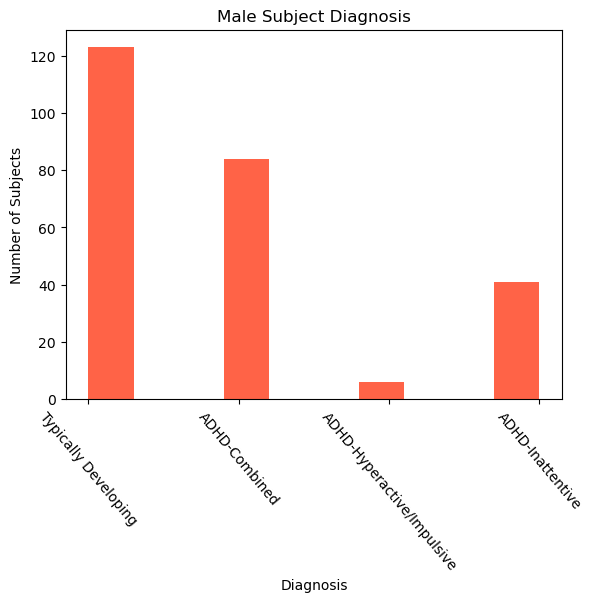

In [17]:
maleDX = maledf['DX']
plt.hist(maleDX, color = 'tomato')
plt.title('Male Subject Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Subjects')
plt.xticks([0,1,2,3],['Typically Developing', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive'], rotation=-50)
plt.show()

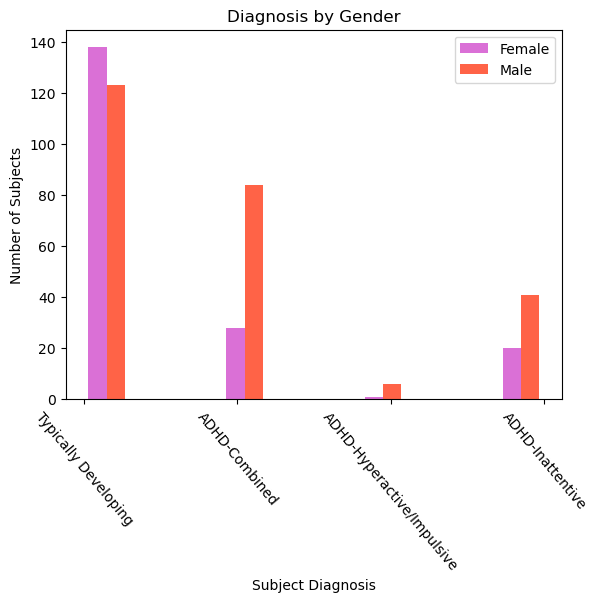

In [18]:
plt.hist([femaleDX,maleDX], color = ['orchid', 'tomato'])
plt.title('Diagnosis by Gender')
plt.xlabel('Subject Diagnosis')
plt.ylabel('Number of Subjects')
plt.legend(['Female','Male'])
plt.xticks([0,1,2,3],['Typically Developing', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive'], rotation=-50)
plt.show()

In [19]:
niqdf = df[df['Full4 IQ']>0]
print('niqdf = df without -999 values')

niqdf = df without -999 values


In [20]:
len(niqdf)

401

In [21]:
'IQ: mean = {}, std = {}, range = {}-{}'.format(niqdf['Full4 IQ'].mean(), niqdf['Full4 IQ'].std(), niqdf['Full4 IQ'].min(), niqdf['Full4 IQ'].max())

'IQ: mean = 109.60548628428928, std = 13.748044218194696, range = 73.0-144.0'

In [22]:
ADHD1df = niqdf[niqdf['DX']==1]
ADHD2df = niqdf[niqdf['DX']==2]
ADHD3df = niqdf[niqdf['DX']==3]
TDiqdf = niqdf[niqdf['DX']==0]

In [23]:
type1IQ = ADHD1df['Full4 IQ']
type2IQ = ADHD2df['Full4 IQ']
type3IQ = ADHD3df['Full4 IQ']
TDIQ = TDiqdf['Full4 IQ']

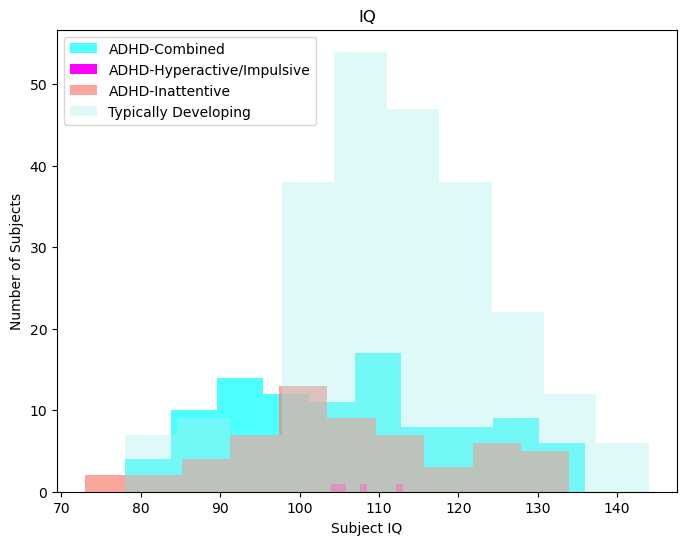

In [24]:
plt.figure(figsize=(8,6))
plt.hist(type1IQ, alpha=0.7, color='cyan')
plt.hist(type2IQ, color='fuchsia')
plt.hist(type3IQ, alpha=0.7, color='salmon')
plt.hist(TDIQ, alpha=0.4, color='paleturquoise')
plt.title('IQ')
plt.xlabel('Subject IQ')
plt.ylabel('Number of Subjects')
plt.legend(['ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive', 'Typically Developing'])
plt.show()

In [25]:
#

In [26]:
ADHDdf

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Subject,ScanDir ID,Site,Gender,Age,Handedness,DX,...,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,ID,subID,has_brain
1,27,27,27,27,2026113.0,3,0.0,12.99,1.0,1,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2026113,True
4,30,30,30,30,1623716.0,3,0.0,12.65,1.0,1,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-1623716,True
7,33,33,33,33,3154996.0,3,1.0,11.65,1.0,3,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-3154996,True
8,34,34,34,34,3160561.0,3,1.0,11.95,1.0,1,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-3160561,True
9,35,35,35,35,4275075.0,3,0.0,10.50,1.0,3,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-4275075,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,572,572,572,572,2367157.0,1,1.0,12.08,1.0,1,...,2.0,-999.0,NaN,NaN,NaN,-999.0,NaN,NaN,sub-2367157,True
383,577,577,577,577,2697768.0,1,0.0,12.58,1.0,3,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2697768,True
386,581,581,581,581,2897046.0,1,0.0,9.17,1.0,3,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2897046,True
393,602,602,602,602,3976121.0,1,1.0,11.00,1.0,1,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-3976121,True


In [27]:
ADHD_index_df = ADHDdf[ADHDdf['ADHD Index']!= -999]

In [28]:
ADHD_index = ADHD_index_df['ADHD Index']

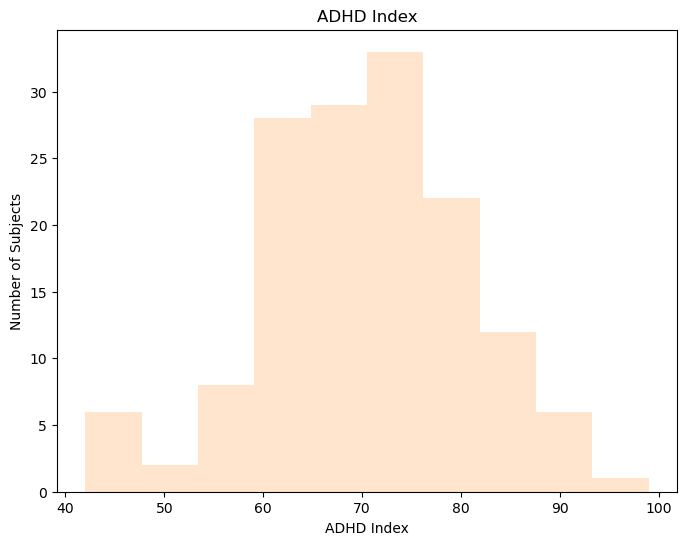

In [29]:
plt.figure(figsize=(8,6))
plt.hist(ADHD_index, alpha=0.7, color='peachpuff')
plt.title('ADHD Index')
plt.xlabel('ADHD Index')
plt.ylabel('Number of Subjects')
plt.show()